In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import pandas as pd
import torch.nn as nn
import seaborn as sns
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:

import pandas as pd
file_path = r"F:\deep learning\asignment1\diabetes.csv"
data_new= pd.read_csv(file_path)
data= data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   759 non-null    int64  
 1   Pregnancies               759 non-null    float64
 2   Glucose                   759 non-null    float64
 3   BloodPressure             759 non-null    float64
 4   SkinThickness             759 non-null    float64
 5   Insulin                   759 non-null    float64
 6   BMI                       759 non-null    float64
 7   DiabetesPedigreeFunction  759 non-null    float64
 8   Age                       759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.3 KB


### Data Visualization

In [24]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [25]:

print("\nStatistical summary:\n", data.describe())


Statistical summary:
           Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  759.000000   759.000000  759.000000     759.000000     759.000000   
mean     0.306983    -0.553902    0.211976       0.130392      -0.584860   
std      0.952343     0.393479    0.321448       0.317587       0.322290   
min     -1.000000    -1.000000   -1.000000      -1.000000      -1.000000   
25%     -1.000000    -0.882353   -0.005025       0.016393      -1.000000   
50%      1.000000    -0.647059    0.165829       0.180328      -0.535354   
75%      1.000000    -0.294118    0.407035       0.311475      -0.353535   
max      1.000000     1.000000    1.000000       1.000000       1.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  759.000000  759.000000                759.000000  759.000000  
mean    -0.812335   -0.046738                 -0.664571   -0.599166  
std      0.273006    0.235680                  0.282291    0.388652  
min     -1.0

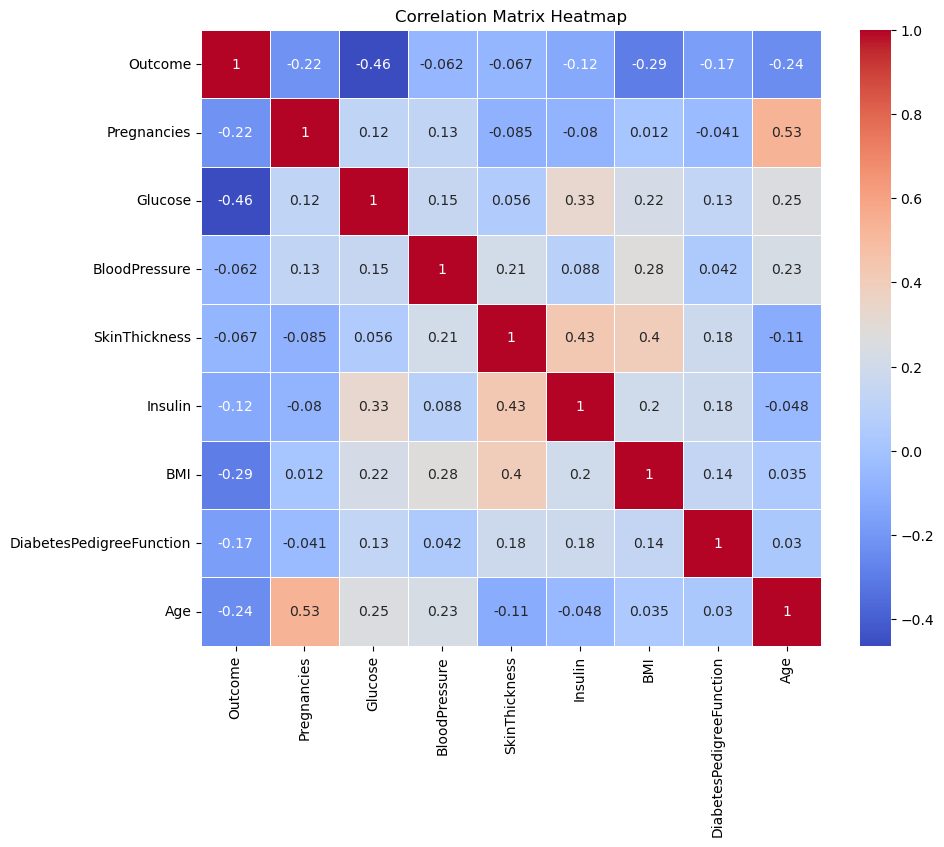

In [26]:

correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

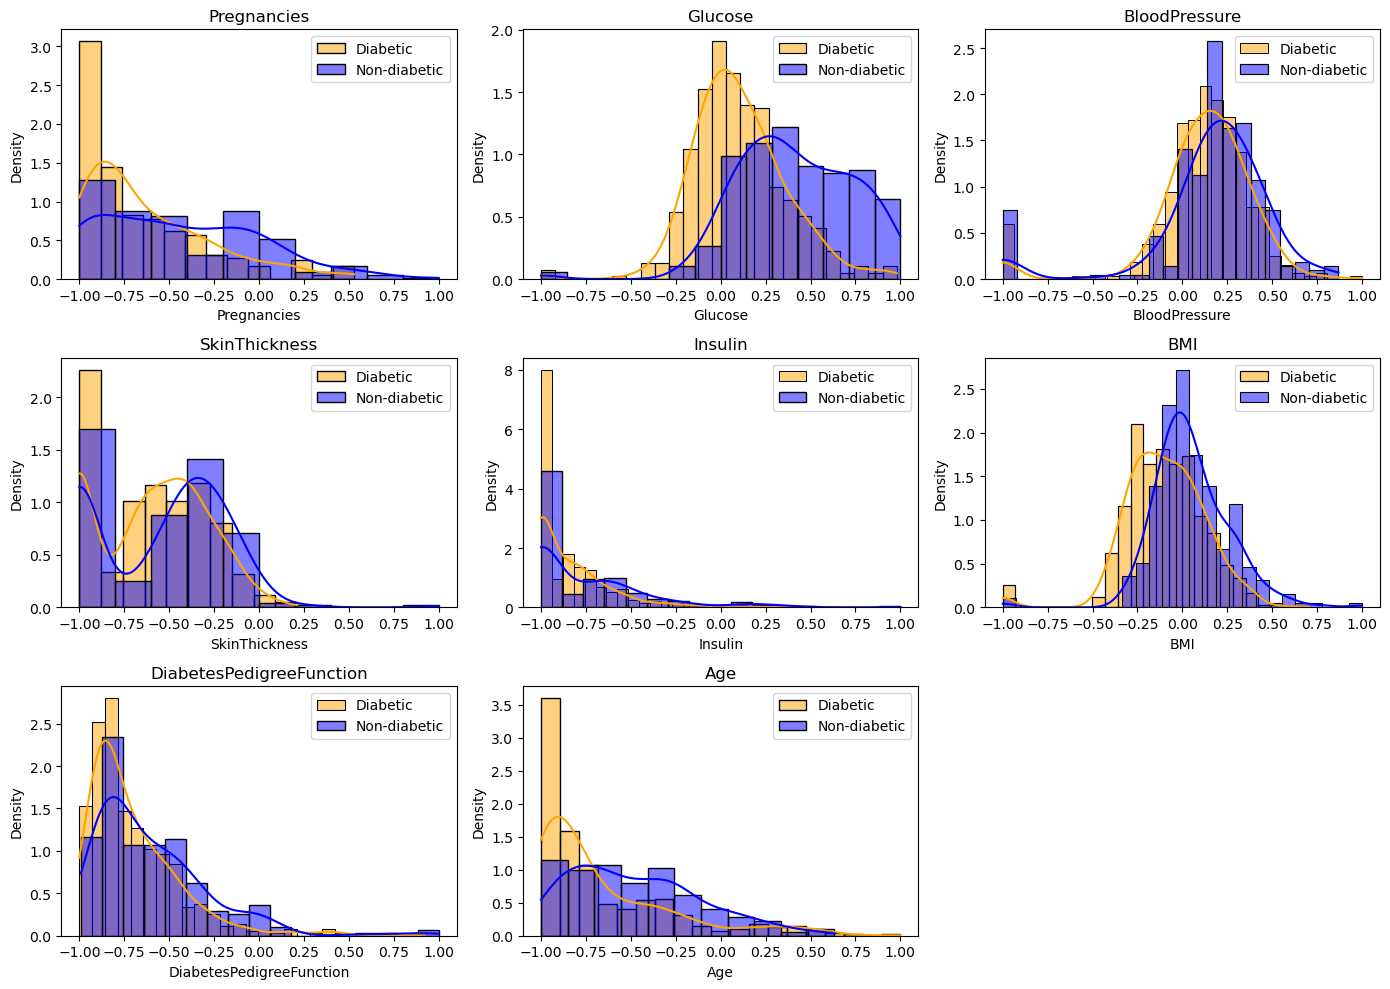

In [27]:

diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == -1]
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(diabetic[feature], color='orange', label='Diabetic', kde=True, stat="density", common_norm=False)
    sns.histplot(non_diabetic[feature], color='blue', label='Non-diabetic', kde=True, stat="density", common_norm=False)
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()

# Multi-layer Perceptron

In [28]:

X = data.drop("Outcome",axis=1).values
y = data_new["Outcome"].values
y = np.where(y == -1, 0, y)
samples = X.shape[0]
train_proportion = 0.7   
val_proportion = 0.15   
train_size = int(train_proportion * samples)
val_size = int(val_proportion * samples)
test_size = samples - train_size - val_size
X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [29]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('device:', device)

device: cpu


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

features = data.drop('Outcome', axis=1)
target = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
perceptron_model = Perceptron()
perceptron_model.fit(X_train_scaled, y_train)
y_pred = perceptron_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 64.47%


In [56]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
         
        self.layers = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim), 
         )
        
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight) 
                nn.init.zeros_(layer.bias)

    def forward(self, x):
        return self.layers(x)
    

torch.manual_seed(10)

input_dimension = X_train.shape[1]  
hidden_dimension = 35  
output_dimension = 2  
learning_rate = 0.01  
mlp_model = MLP(input_dimension, hidden_dimension, output_dimension)  
loss_criterion = nn.CrossEntropyLoss()  
weight_decay_coefficient = 0.004  
optimizer = optim.SGD(mlp_model.parameters(), lr=learning_rate, weight_decay=weight_decay_coefficient)

training_accuracies, validation_accuracies, training_losses = [], [], []


for epoch in range(100):  
    print(f'Starting epoch {epoch + 1}')

    
    outputs = mlp_model(X_train_tensor)
    loss = loss_criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())
    with torch.no_grad():
        _, train_predicted = torch.max(outputs, 1)
        train_accuracy = (train_predicted == y_train_tensor).float().mean()
        training_accuracies.append(train_accuracy)
        val_outputs = mlp_model(X_val_tensor)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == y_val_tensor).float().mean()
        validation_accuracies.append(val_accuracy)
    print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')
print('Training process has finished.')
best_validation_accuracy = max(validation_accuracies)
print(f"The best validation accuracy: {best_validation_accuracy:.4f}")

Starting epoch 1
Epoch 1, Loss: 3.7067, Train Accuracy: 0.0113, Validation Accuracy: 0.0000
Starting epoch 2
Epoch 2, Loss: 3.6920, Train Accuracy: 0.0169, Validation Accuracy: 0.0000
Starting epoch 3
Epoch 3, Loss: 3.6774, Train Accuracy: 0.0207, Validation Accuracy: 0.0000
Starting epoch 4
Epoch 4, Loss: 3.6630, Train Accuracy: 0.0264, Validation Accuracy: 0.0000
Starting epoch 5
Epoch 5, Loss: 3.6486, Train Accuracy: 0.0282, Validation Accuracy: 0.0088
Starting epoch 6
Epoch 6, Loss: 3.6344, Train Accuracy: 0.0301, Validation Accuracy: 0.0088
Starting epoch 7
Epoch 7, Loss: 3.6203, Train Accuracy: 0.0320, Validation Accuracy: 0.0177
Starting epoch 8
Epoch 8, Loss: 3.6063, Train Accuracy: 0.0358, Validation Accuracy: 0.0265
Starting epoch 9
Epoch 9, Loss: 3.5924, Train Accuracy: 0.0433, Validation Accuracy: 0.0354
Starting epoch 10
Epoch 10, Loss: 3.5786, Train Accuracy: 0.0508, Validation Accuracy: 0.0354
Starting epoch 11
Epoch 11, Loss: 3.5649, Train Accuracy: 0.0565, Validation A

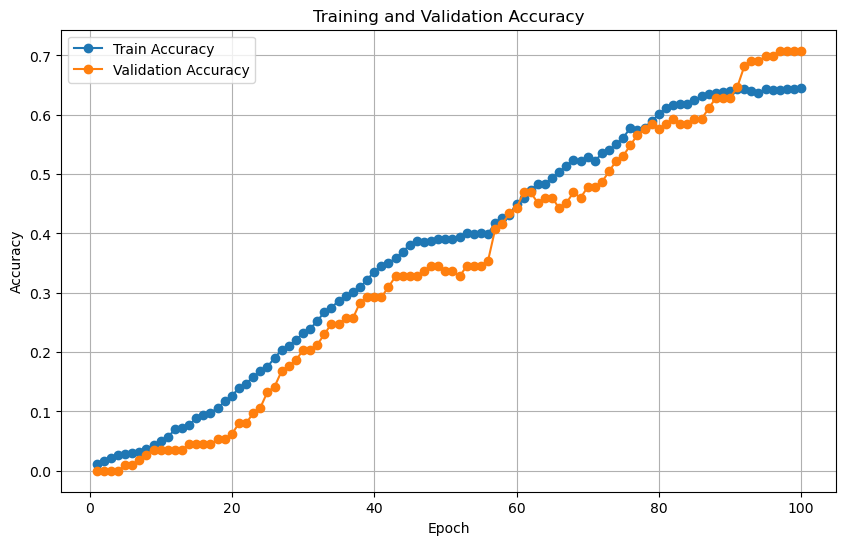

In [57]:

epochs = range(1, len(training_accuracies) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracies, label='Train Accuracy', marker='o', linestyle='-')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

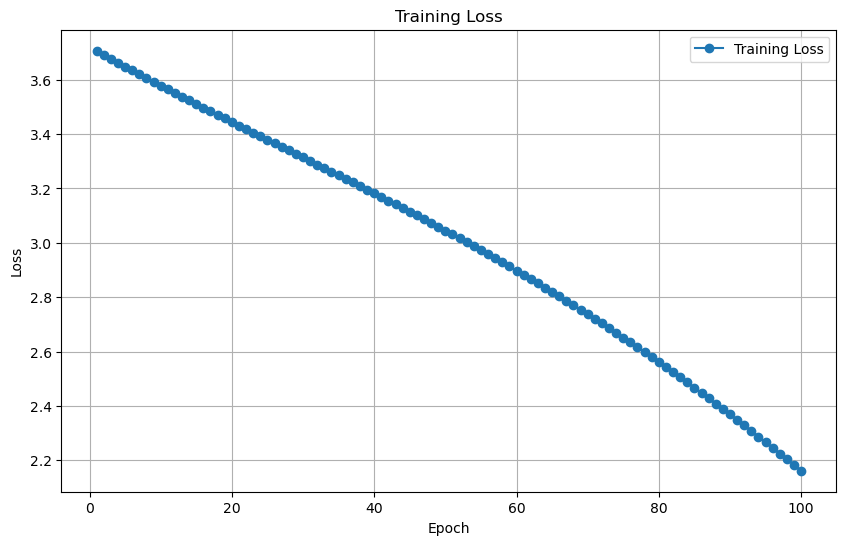

In [58]:
epochs = range(1, len(training_losses) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_losses, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.grid(True)
plt.show()

### Three-Layer Perceptron

In [59]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP, self).__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),  
            nn.ReLU(), 
            nn.Linear(hidden_dim1, hidden_dim2), 
            nn.ReLU(), 
            nn.Linear(hidden_dim2, output_dim), 
        )
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight) 
                nn.init.zeros_(layer.bias)

    def forward(self, x):
        return self.layers(x)
    
torch.manual_seed(10)
input_dimension = X_train.shape[1] 
hidden_dimension1 = 50  
hidden_dimension2 = 35  
output_dimension = 2 
learning_rate = 0.01 
mlp_model = MLP(input_dimension, hidden_dimension1, hidden_dimension2, output_dimension)
loss_criterion = nn.CrossEntropyLoss()
weight_decay_coefficient = 0.004
optimizer = optim.SGD(mlp_model.parameters(), lr=learning_rate, weight_decay=weight_decay_coefficient)
training_accuracies, validation_accuracies, training_losses = [], [], []
for epoch in range(100):
    print(f'Starting epoch {epoch + 1}')

    outputs = mlp_model(X_train_tensor)
    loss = loss_criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())
    with torch.no_grad():
        _, train_predicted = torch.max(outputs, 1)
        train_accuracy = (train_predicted == y_train_tensor).float().mean()
        training_accuracies.append(train_accuracy)
        val_outputs = mlp_model(X_val_tensor)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == y_val_tensor).float().mean()
        validation_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Training process has finished.')
best_validation_accuracy = max(validation_accuracies)
print(f"The best validation accuracy: {best_validation_accuracy:.4f}")

Starting epoch 1
Epoch 1, Loss: 0.6745, Train Accuracy: 0.6403, Validation Accuracy: 0.7168
Starting epoch 2
Epoch 2, Loss: 0.6736, Train Accuracy: 0.6441, Validation Accuracy: 0.7168
Starting epoch 3
Epoch 3, Loss: 0.6728, Train Accuracy: 0.6441, Validation Accuracy: 0.7168
Starting epoch 4
Epoch 4, Loss: 0.6721, Train Accuracy: 0.6422, Validation Accuracy: 0.7168
Starting epoch 5
Epoch 5, Loss: 0.6713, Train Accuracy: 0.6441, Validation Accuracy: 0.7168
Starting epoch 6
Epoch 6, Loss: 0.6706, Train Accuracy: 0.6422, Validation Accuracy: 0.7168
Starting epoch 7
Epoch 7, Loss: 0.6699, Train Accuracy: 0.6403, Validation Accuracy: 0.7168
Starting epoch 8
Epoch 8, Loss: 0.6693, Train Accuracy: 0.6403, Validation Accuracy: 0.7168
Starting epoch 9
Epoch 9, Loss: 0.6686, Train Accuracy: 0.6403, Validation Accuracy: 0.7168
Starting epoch 10
Epoch 10, Loss: 0.6680, Train Accuracy: 0.6403, Validation Accuracy: 0.7168
Starting epoch 11
Epoch 11, Loss: 0.6674, Train Accuracy: 0.6422, Validation A

### dropout

In [60]:

torch.manual_seed(10)

class MLPWithDropout(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_prob=0.5):
        super(MLPWithDropout, self).__init__()
       
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), 
            nn.ReLU(),  
            nn.Dropout(p=dropout_prob), 
            nn.Linear(hidden_dim, hidden_dim), 
        )
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)

    def forward(self, x):
        return self.layers(x)
input_dimension = X_train.shape[1] 
hidden_dimension = 35 
output_dimension = 2 
learning_rate = 0.01  
dropout_probability = 0.5 

mlp_model_with_dropout = MLPWithDropout(input_dimension, hidden_dimension, output_dimension, dropout_prob=dropout_probability)
loss_criterion = nn.CrossEntropyLoss()
weight_decay_coefficient = 0.004 
optimizer = optim.SGD(mlp_model_with_dropout.parameters(), lr=learning_rate, weight_decay=weight_decay_coefficient)

training_accuracies, validation_accuracies, training_losses = [], [], []

for epoch in range(100):
    print(f'Starting epoch {epoch + 1}')


    outputs = mlp_model_with_dropout(X_train_tensor)
    loss = loss_criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())
    with torch.no_grad():
        _, train_predicted = torch.max(outputs, 1)
        train_accuracy = (train_predicted == y_train_tensor).float().mean()
        training_accuracies.append(train_accuracy)
        val_outputs = mlp_model_with_dropout(X_val_tensor)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == y_val_tensor).float().mean()
        validation_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Training process has finished.')
best_validation_accuracy = max(validation_accuracies)
print(f"The best validation accuracy: {best_validation_accuracy:.4f}")


Starting epoch 1
Epoch 1, Loss: 3.7169, Train Accuracy: 0.0151, Validation Accuracy: 0.0088
Starting epoch 2
Epoch 2, Loss: 3.7191, Train Accuracy: 0.0132, Validation Accuracy: 0.0088
Starting epoch 3
Epoch 3, Loss: 3.7040, Train Accuracy: 0.0075, Validation Accuracy: 0.0354
Starting epoch 4
Epoch 4, Loss: 3.6820, Train Accuracy: 0.0151, Validation Accuracy: 0.0000
Starting epoch 5
Epoch 5, Loss: 3.6476, Train Accuracy: 0.0245, Validation Accuracy: 0.0265
Starting epoch 6
Epoch 6, Loss: 3.6485, Train Accuracy: 0.0301, Validation Accuracy: 0.0265
Starting epoch 7
Epoch 7, Loss: 3.6398, Train Accuracy: 0.0245, Validation Accuracy: 0.0265
Starting epoch 8
Epoch 8, Loss: 3.6293, Train Accuracy: 0.0358, Validation Accuracy: 0.0354
Starting epoch 9
Epoch 9, Loss: 3.6247, Train Accuracy: 0.0301, Validation Accuracy: 0.0265
Starting epoch 10
Epoch 10, Loss: 3.5981, Train Accuracy: 0.0471, Validation Accuracy: 0.0088
Starting epoch 11
Epoch 11, Loss: 3.5807, Train Accuracy: 0.0452, Validation A

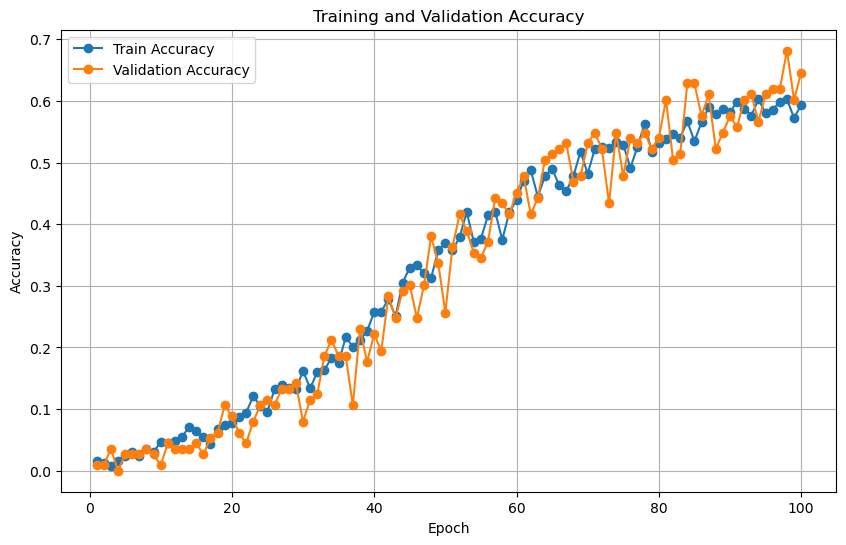

In [61]:
epochs = range(1, len(training_accuracies) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracies, label='Train Accuracy', marker='o', linestyle='-')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

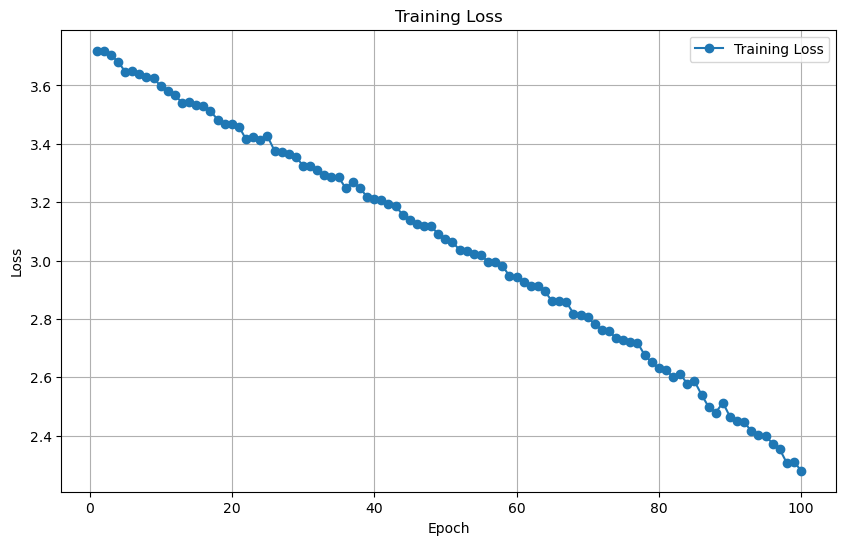

In [62]:
epochs = range(1, len(training_losses) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_losses, label='Training Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()